# Ekhator Uwaila's Notebook
# MID-TERM

In [2]:
import pandas as pd 

data = pd.read_csv('pnp-train.txt',delimiter='\t',encoding='latin-1', # utf8 encoding didn't work for this
                  names=['type','name']) # supply the column names for the dataframe

In [3]:
data[:20]

,type,name
0,drug,Dilotab
1,movie,Beastie Boys: Live in Glasgow
2,person,Michelle Ford-Eriksson
3,place,Ramsbury
4,place,Market Bosworth
5,drug,Cyanide Antidote Package
6,person,Bill Johnson
7,place,Ettalong
8,movie,The Suicide Club
9,place,Pézenas


In [4]:
data.describe()

,type,name
count,21001,21001
unique,5,20992
top,movie,Epinal
freq,6262,2


In [5]:
from collections import Counter as ctr
ctr(data.type)

Counter({'movie': 6262,
         'drug': 5030,
         'person': 3836,
         'place': 3389,
         'company': 2484})

### NORMALIZATION

#### Case normalization
This is done to convert all the names on the dataset to lowercase.

In [6]:
#converting to lowercase
data['name_normalized'] = data['name'].apply(lambda x: x.lower())

#### Tokenization
This is don to split the sentences into words, i used nltk word_tokenize to do this

In [7]:
# Tokenization using NLTK
import nltk
from nltk import word_tokenize
data['name_normalized']= data['name_normalized'].apply(lambda x: word_tokenize(x))

In [8]:
data

,type,name,name_normalized
0,drug,Dilotab,[dilotab]
1,movie,Beastie Boys: Live in Glasgow,"[beastie, boys, :, live, in, glasgow]"
2,person,Michelle Ford-Eriksson,"[michelle, ford-eriksson]"
3,place,Ramsbury,[ramsbury]
4,place,Market Bosworth,"[market, bosworth]"
...,...,...,...
20996,movie,Old Pals,"[old, pals]"
20997,place,Mailly-le-Château,[mailly-le-château]
20998,place,Sudbury,[sudbury]
20999,place,West Wickham,"[west, wickham]"


#### Stopword Removal
This is don to remove stopwords like the, is, in, etc which dont carry particular meaning.
I decided to use all stopwords available in all languages and not just english because i noticed when viewing the dataset, that some items or rows on the dataset are not in english.

In [9]:
from nltk.corpus import stopwords

# Getting all available stopwords languages in NLTK
languages = stopwords.fileids()

# Creating a set to store all languages stopwords to avoid duplicates
all_stopwords = set()

# Adding all the stopwords to the set
for all in languages:
    all_stopwords.update(set(stopwords.words(all)))

#function to remove stopwords in my dataset
def stopwords_remover(tokens):
    '''This function removes stopwords in all languages '''
    return [word for word in tokens if word not in all_stopwords]

data['name_normalized'] = data['name_normalized'].apply(stopwords_remover)

data


,type,name,name_normalized
0,drug,Dilotab,[dilotab]
1,movie,Beastie Boys: Live in Glasgow,"[beastie, boys, :, live, glasgow]"
2,person,Michelle Ford-Eriksson,"[michelle, ford-eriksson]"
3,place,Ramsbury,[ramsbury]
4,place,Market Bosworth,"[market, bosworth]"
...,...,...,...
20996,movie,Old Pals,[pals]
20997,place,Mailly-le-Château,[mailly-le-château]
20998,place,Sudbury,[sudbury]
20999,place,West Wickham,"[west, wickham]"


In [10]:
data[:20]

,type,name,name_normalized
0,drug,Dilotab,[dilotab]
1,movie,Beastie Boys: Live in Glasgow,"[beastie, boys, :, live, glasgow]"
2,person,Michelle Ford-Eriksson,"[michelle, ford-eriksson]"
3,place,Ramsbury,[ramsbury]
4,place,Market Bosworth,"[market, bosworth]"
5,drug,Cyanide Antidote Package,"[cyanide, antidote, package]"
6,person,Bill Johnson,"[bill, johnson]"
7,place,Ettalong,[ettalong]
8,movie,The Suicide Club,"[suicide, club]"
9,place,Pézenas,[pézenas]


#### Lemmatization

In [11]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

#function to lemmatize
def lemmatizer(tokens):
    '''This function is used to lemmatize'''
    return [wnl.lemmatize(word) for word in tokens]

data['name_normalized'] = data['name_normalized'].apply(lemmatizer)

In [12]:
data[:20]

,type,name,name_normalized
0,drug,Dilotab,[dilotab]
1,movie,Beastie Boys: Live in Glasgow,"[beastie, boy, :, live, glasgow]"
2,person,Michelle Ford-Eriksson,"[michelle, ford-eriksson]"
3,place,Ramsbury,[ramsbury]
4,place,Market Bosworth,"[market, bosworth]"
5,drug,Cyanide Antidote Package,"[cyanide, antidote, package]"
6,person,Bill Johnson,"[bill, johnson]"
7,place,Ettalong,[ettalong]
8,movie,The Suicide Club,"[suicide, club]"
9,place,Pézenas,[pézenas]


#### Punctuation Removal

In [13]:
import string

# Function to remove punctuation from a text
def punctuation_remover(tokens):
    return [token.translate(token.maketrans('', '', string.punctuation)) for token in tokens]

data['name_normalized'] = data['name_normalized'].apply(punctuation_remover)
data[:20]

,type,name,name_normalized
0,drug,Dilotab,[dilotab]
1,movie,Beastie Boys: Live in Glasgow,"[beastie, boy, , live, glasgow]"
2,person,Michelle Ford-Eriksson,"[michelle, forderiksson]"
3,place,Ramsbury,[ramsbury]
4,place,Market Bosworth,"[market, bosworth]"
5,drug,Cyanide Antidote Package,"[cyanide, antidote, package]"
6,person,Bill Johnson,"[bill, johnson]"
7,place,Ettalong,[ettalong]
8,movie,The Suicide Club,"[suicide, club]"
9,place,Pézenas,[pézenas]


In [14]:
data.groupby('type').count()

,name,name_normalized
type,,
company,2484,2484
drug,5030,5030
movie,6262,6262
person,3836,3836
place,3389,3389


In [15]:
type_ctr = ctr(data.type)

type_ctr['company']/len(data), type_ctr['drug']/len(data), type_ctr['movie']/len(data), type_ctr['person']/len(data), type_ctr['place']/len(data)

(0.11828008190086187,
 0.23951240417122993,
 0.29817627732012764,
 0.18265796866815867,
 0.16137326793962192)

In [16]:
def tester(type):
    ''' function to return the percent of each type in the dataset'''
    type_ctr = ctr(data.type)
    percent = (type_ctr[type]/len(data))*100
    return type + ' ' + str(percent)
[tester(type) for type in type_ctr]

['drug 23.951240417122992',
 'movie 29.817627732012763',
 'person 18.26579686681587',
 'place 16.137326793962192',
 'company 11.828008190086187']

The dataset is fairly evenly distributed.

### TEST-TRAIN SPLIT

In [17]:
test = data.sample(frac=0.1)
train = data[~data.index.isin(test.index)]

train.shape, test.shape

((18901, 3), (2100, 3))

### NAIVE-BAYES CLASSIFIER

This follows Bayes Theorem: $P(T|N) = \frac{P(N|T).P(T)}{P(N)}$ <br><br>
where $P(T|N)$ is prob_of_type_given_name i.e posterior probability <br>
$P(N|T)$ is prob_of_name_given_type i.e maximum likelihood<br>
$P(T)$ is prob_of_type i.e prior probability<br>
$P(N)$ is prob_of_name i.e normalization <br>


#### Prior Probability

In [18]:
alltypes_ctr = ctr(train.type)

def prob_of_type(T=''):
    """ Calculate the probability of each type in the dataset """
    if T not in alltypes_ctr: return 0.0001
    return alltypes_ctr[T] / len(train)

#### Normalization

In [19]:
#relook this, consider it being the probability of the entire sequence occurring

allnames_ctr = ctr([word for row in train.name_normalized for word in row])

def prob_of_name(N=''):
    if N not in allnames_ctr: return 0.0001
    return allnames_ctr[N] / sum(allnames_ctr.values())

#### Maximum Likelihood

In [20]:
words_type = {}

for col_name in list(set(data.type)):
    sub_df = train[train.type == col_name]
    words_type[col_name] = []
    for row in sub_df.name_normalized:
        for word in row:
            words_type[col_name].append(word)
    words_type[col_name] = ctr(words_type[col_name])

def  prob_of_name_given_type (N='', T=''):
    t = words_type[T]
    if N not in t: return 0.0000001
    return t[N] / sum(t.values())

In [21]:
def prob_of_type_given_name(T='', N=''):
    return prob_of_name_given_type(N, T) * prob_of_type(T) / prob_of_name(N)

In [22]:
#To apply it to a list of words i.e our tokenized sentence
import numpy as np
def Ps(sentence, T=''):
    return np.prod([prob_of_type_given_name(T=T, N=name) for name in sentence])

In [23]:
Ps(['dilotab'], 'person')

0.0007458108036611819

In [24]:
# def naive_bayes_classifier(name):
#     company_prob = Ps(name, T='company')
#     drug_prob = Ps(name, T='drug')
#     movie_prob = Ps(name, T='movie')
#     person_prob = Ps(name, T='person')
#     place_prob = Ps(name, T='place')

#     max_prob = max(company_prob, drug_prob, movie_prob, person_prob, place_prob)

#     if max_prob == company_prob:
#         return 'company'
#     elif max_prob == drug_prob:
#         return 'drug'
#     elif max_prob == movie_prob:
#         return 'movie'
#     elif max_prob == person_prob:
#         return 'person'
#     elif max_prob == place_prob:
#         return 'place'

In [25]:
# #Testing my classifier
# naive_bayes_classifier(['cyanide', 'antidote', 'package'])

In [26]:
def naive_bayes_classifier2(name):
    types = ['company', 'drug', 'movie', 'person', 'place']
    prob = [Ps(name, T) for T in types]
    max_prob_index = prob.index(max(prob))
    return types[max_prob_index]


In [27]:
#Testing my classifier
naive_bayes_classifier2(['cyanide', 'antidote', 'package'])

'drug'

#### Accuracy score with normalization:

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
predicted_labels = [naive_bayes_classifier2(name) for name in test['name_normalized']]
actual_labels = test['type'] 
accuracy = accuracy_score(actual_labels, predicted_labels)

In [29]:
print("Test accuracy:", accuracy)

Test accuracy: 0.6271428571428571


#### Accuracy score without normalization:

In [30]:
predicted_labels2 = [naive_bayes_classifier2(name) for name in test['name'].map(lambda x: x.strip().split())]
actual_labels2 = test['type'] 
accuracy2 = accuracy_score(actual_labels2, predicted_labels2)

In [31]:
print("Test accuracy:", accuracy2)

Test accuracy: 0.34


#### What are the two baselines for this particular task? How did you determine the two baselines?
- The first baseline is the random baseline, since we have 5 classes, it would be 1/5 which gives us 20%. Our accuracy score is 63% which is above the 20% random baseline.
- The second baseline has to do with the majority class, in this case the majority class is movie which has 6262 rows, this makes up about 29.8% of the data set. Our accuracy score is 63% which is above the 29.8% majority class baseline.


#### What is the accuracy of your classifier?
The accuracy of my classifier is 0.6271428571428571 i.e. about 63%

#### What kind of normalization did you apply? Why does it make sense to do that for this particular task?

I applied case normalization, tokenization, stopword removal, lemmatization and punctuation removal.
<br>
Case normalization was used to convert all uppercase text to lowercase, this made sense because it helped to make the data consistent and wasier to process, it also improved the performance of our model.
<br><br>
Tokenization was used to break the sentences into individual words. 
<br><br>
Stopword removal was used to remove unnecessary words which didnt have much meaning. It made sense to do this, because it reduced the dimension of the data and improved the performance of the nlp algorithm.
<br><br>
Lemmatization was used to reduce words to their base form, i decided to use this over stemming because lemmatization preserves the word context and is more accurate than stemming. Lemmatization also helos identify the core meaning of a word.
<br><br>
Punctuation Removal was used to remove special characters and punctuation marks from a text, i noticed that the dataset had a number of special characters so i felt this was necessary

#### How does your accuracy change if you don’t apply that normalization strategy?
Without normalization my accuracy was 0.34

#### What modeling approach did you use? I.e., how did you model the probability of a name (a sequence of words)?

I applied Bayes Theorem: $P(T|N) = \frac{P(N|T).P(T)}{P(N)}$ <br><br>
where $P(T|N)$ is prob_of_type_given_name i.e posterior probability <br>
$P(N|T)$ is prob_of_name_given_type i.e maximum likelihood<br>
$P(T)$ is prob_of_type i.e prior probability<br>
$P(N)$ is prob_of_name i.e normalization <br>


#### What assumptions does your model make?

It asumes that the predictors i.e. the names in this case are conditionally independent <br>
It assumes that all features contribute equally to the outcome

#### Create a confusion matrix of your model’s predictions/guesses vs. the real types. What do you notice?

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(actual_labels, predicted_labels)
conf_matrix

array([[202,   1,  34,   2,   2],
       [  2, 244, 234,   2,   1],
       [ 15,  11, 559,  25,   6],
       [  3,   1, 111, 281,   6],
       [  9,   2, 300,  16,  31]])

<Figure size 1500x1200 with 0 Axes>

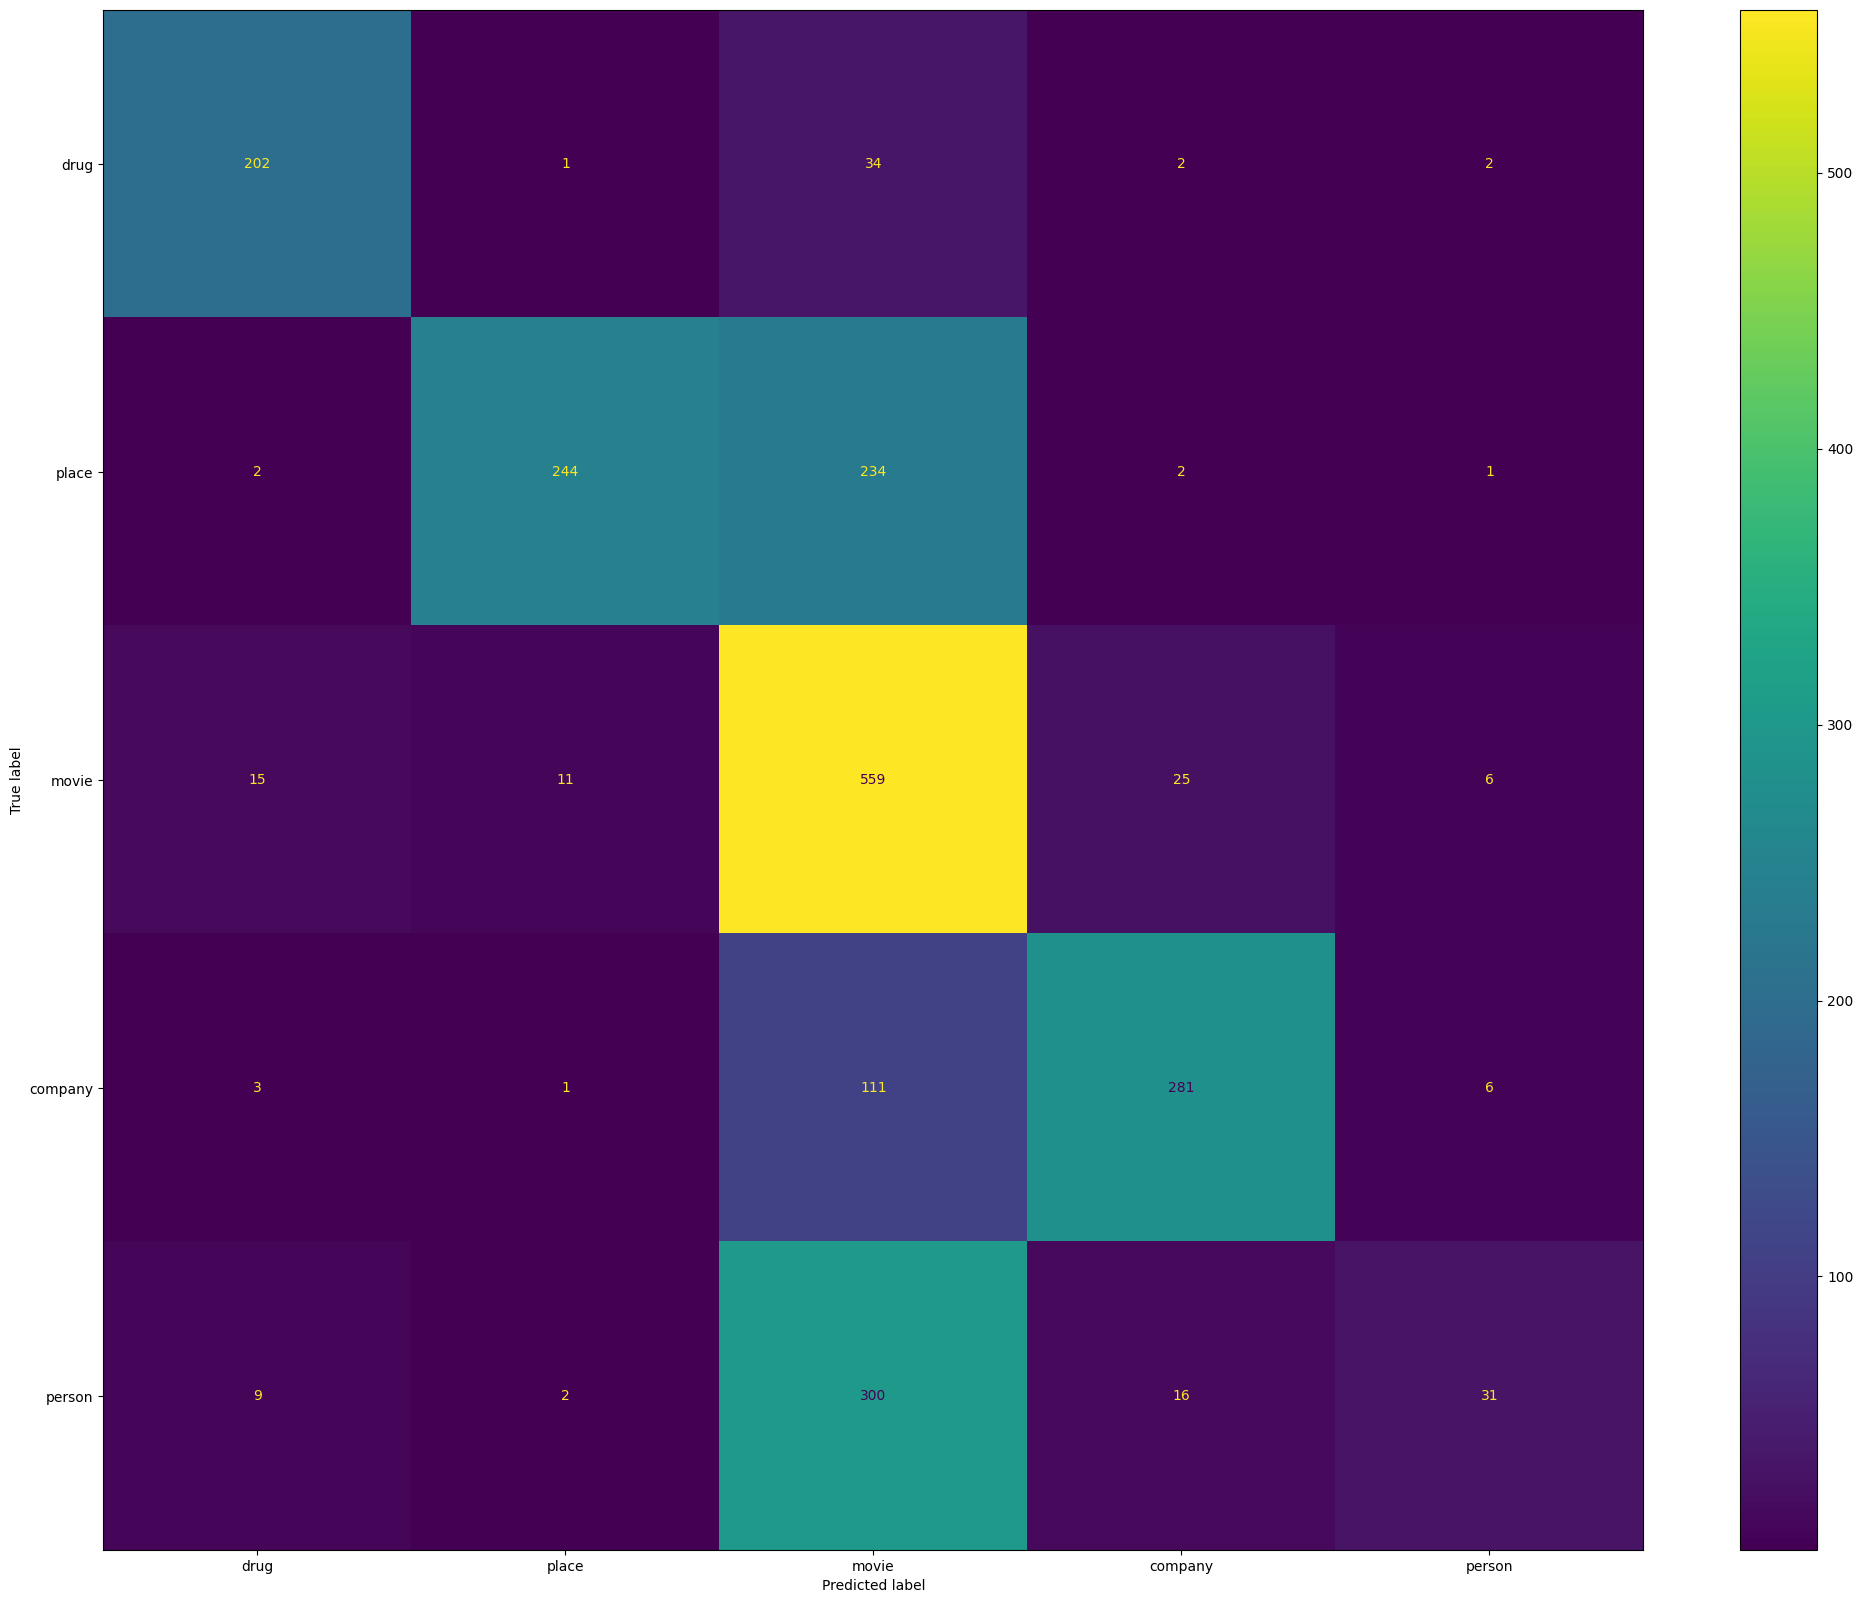

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=set(test['type']))
fig, ax = plt.subplots(figsize=(25,20))
disp.plot(ax=ax)
plt.show()

300 persons were misclassified as movie <br>
34 drugs were misclasified as movies  <br>
111 companies were miclassified as movies <br>
movie has the highest number of correct classifications